In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities
import seaborn as sns; 
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

# EDA

## Shape of Data set

In [3]:
df.shape

(440, 8)

440 instances and 8 attributes 

##  Preview dataset 

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
print("Channel unique values:",df['Channel'].unique())
print("Region unique values",df['Region'].unique())

Channel unique values: [2 1]
Region unique values [3 1 2]


We can see that Channel variable contains values as 1 and 2.

These two values classify the customers from two different channels as

1 for Horeca (Hotel/Retail/Café) customers and
2 for Retail channel (nominal) customers.

Region - 3 unique values
Lisnon, Oporto or Other (Nominal)

## Summary of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We can see that no null value and all the data inputs are having numeric datatype

## Summary statistics of dataset 

In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Check missing value

In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We can see that there are no missing values in the dataset. Thus, there is no need to use the dropna() function.

    6 continuous types of feature ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen')
    2 categoricals features ('Channel', 'Region')

In [9]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

### Channel Count

In [10]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

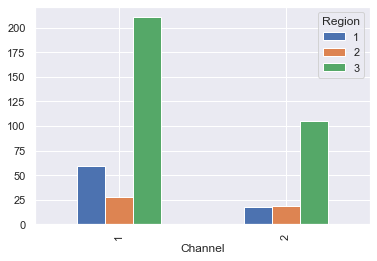

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [11]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')    

In [12]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

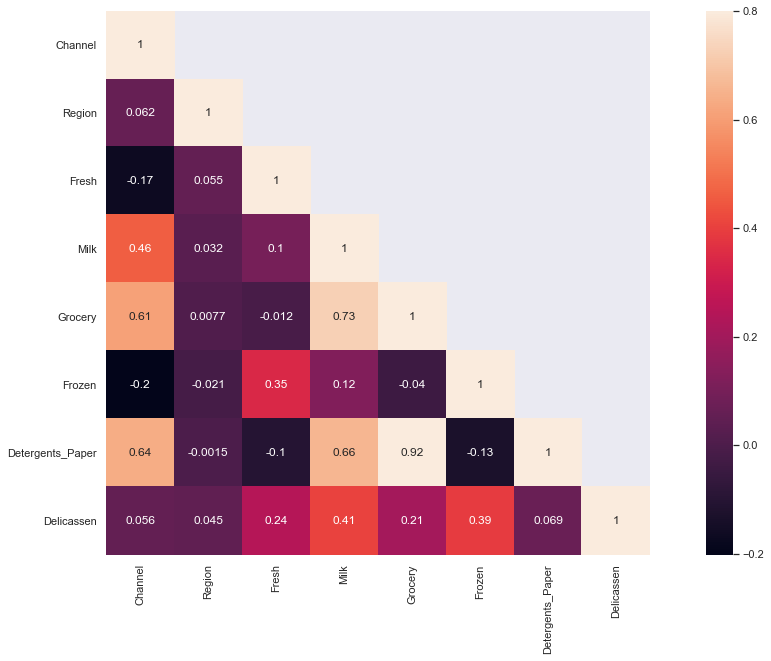

In [13]:
# Correlation analysis
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

Looking at the plot above, there are a few pairs of features that exhibit some degree of correlation. They include:

#### Grocery and Detergents_Paper are highly correlated  - 0.92
#### Milk and Groceries - 0.73
#### Milk and Detergents_Paper - 0.66

## Outliers

<AxesSubplot:>

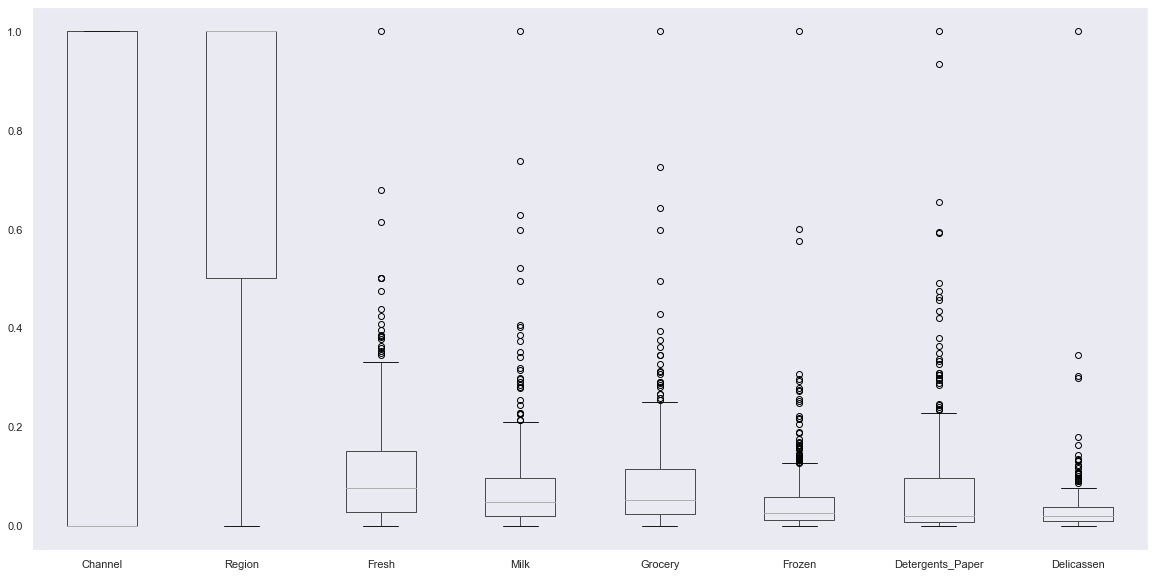

In [14]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns = [name for name in list(df)])
fig = plt.figure(figsize = (20,10))
scaled_data.boxplot(column=[name for name in list(scaled_data)], grid=False)

This shows that no outliers present in the dataset

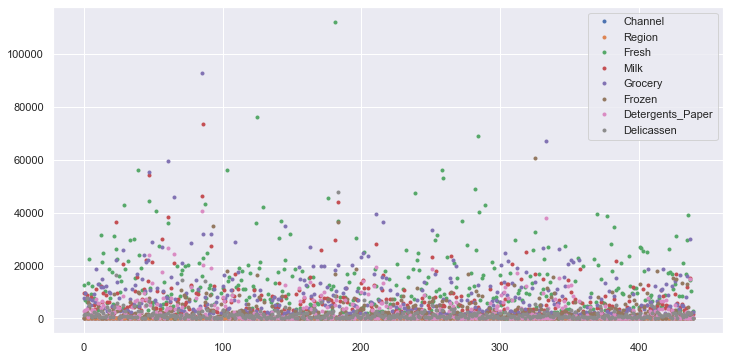

In [15]:
# No obvious trend in data set as sequence
%matplotlib inline
df.plot(figsize=(12,6), style='.');

Q. Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler 
and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to 
why it was selected?

Some features in our data might have high-magnitude values (for example, annual salary), while others might have relatively low values (for example, the number of years worked at a company). Just because some data has smaller values does not mean it is less significant. So, to make sure our prediction does not vary because of different magnitudes of features in our data, we can perform feature scaling, standardization, or normalization

Implementing Scaling Using the
## Standard Scaler Method

In [16]:
df1 = df.copy()

In [17]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(df1)

scaled_frame = pd.DataFrame(std_scale, columns=df1.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [18]:
scaled_frame.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

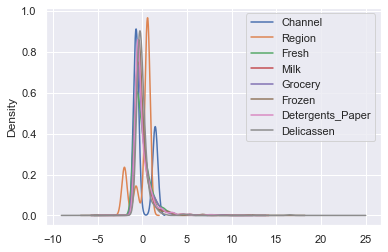

In [19]:
pd.DataFrame(scaled_frame).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

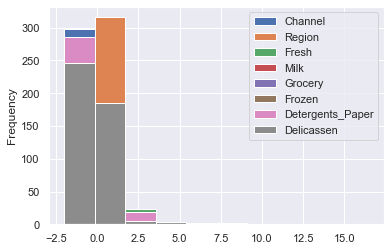

In [20]:
pd.DataFrame(scaled_frame).plot(kind='hist', bins=10)

Using the StandardScaler method, we have scaled the data into a uniform unit over all the columns. As you can see in the preceding table, the values of all the features have been converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.
Kind kde is seems to be better then hist because in hist, data seems to be overlapped and unable to see the value for each field, whereas for kde, data visualization is finer.

 Implementing Scaling Using the 
 ## MinMax Scaler Method

In [21]:
df2 = df.copy()

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler().fit_transform(df)

scaled_frame2 = pd.DataFrame(minmax_scale,columns=df.columns)

scaled_frame2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [23]:
scaled_frame2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

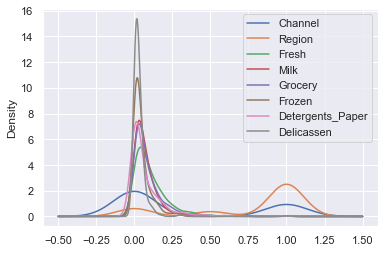

In [24]:
pd.DataFrame(scaled_frame2).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

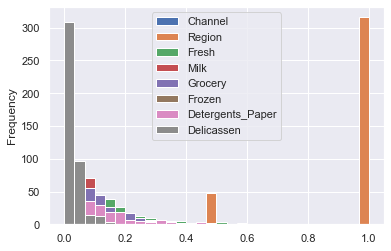

In [25]:
pd.DataFrame(scaled_frame2).plot(kind='hist', bins=30)

Using the MinMaxScaler method, we have again scaled the data into a uniform unit over all the columns. As you can see in the preceding table, the values of all the features have been converted into a uniform range of the same scale[0,1].

Ans: In Standardscaler, it assumes that data has normally distributed features and it has scaled them to zero mean and 1 standard deviation.

All the features are of the same scale after applying the scaler.

While in Minmaxscaler, it shrinks the data within the range of -1 to 1(if there are negative values) and responds well if standard deviation is small and is used when distribution is not Gaussian.This scaler is sensitive to outliers.

In Standard scaler, centered curves are there with no outliers and in minmax, outliers are there.

So here, we will continue with standard scaler.

In [26]:
df_Con=df.drop(['Channel','Region'], axis=1)  # drop Categorical features

In [27]:
df_Con.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 720x576 with 0 Axes>

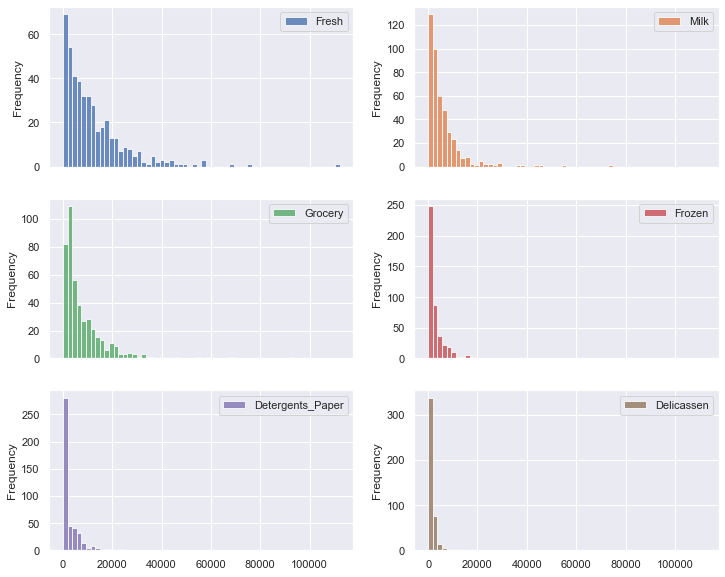

In [28]:
# Histogram
plt.figure(figsize=(10,8))
df_Con.plot(kind='hist', alpha=0.8,bins=60, subplots=True,layout=(3,2),legend=True,figsize=(12,10))

The histograms show an exponential decline in the number of orders for the respected products. hence this could be a cluster consisting of larger size companies with higher purchase quanitites for these particular items.

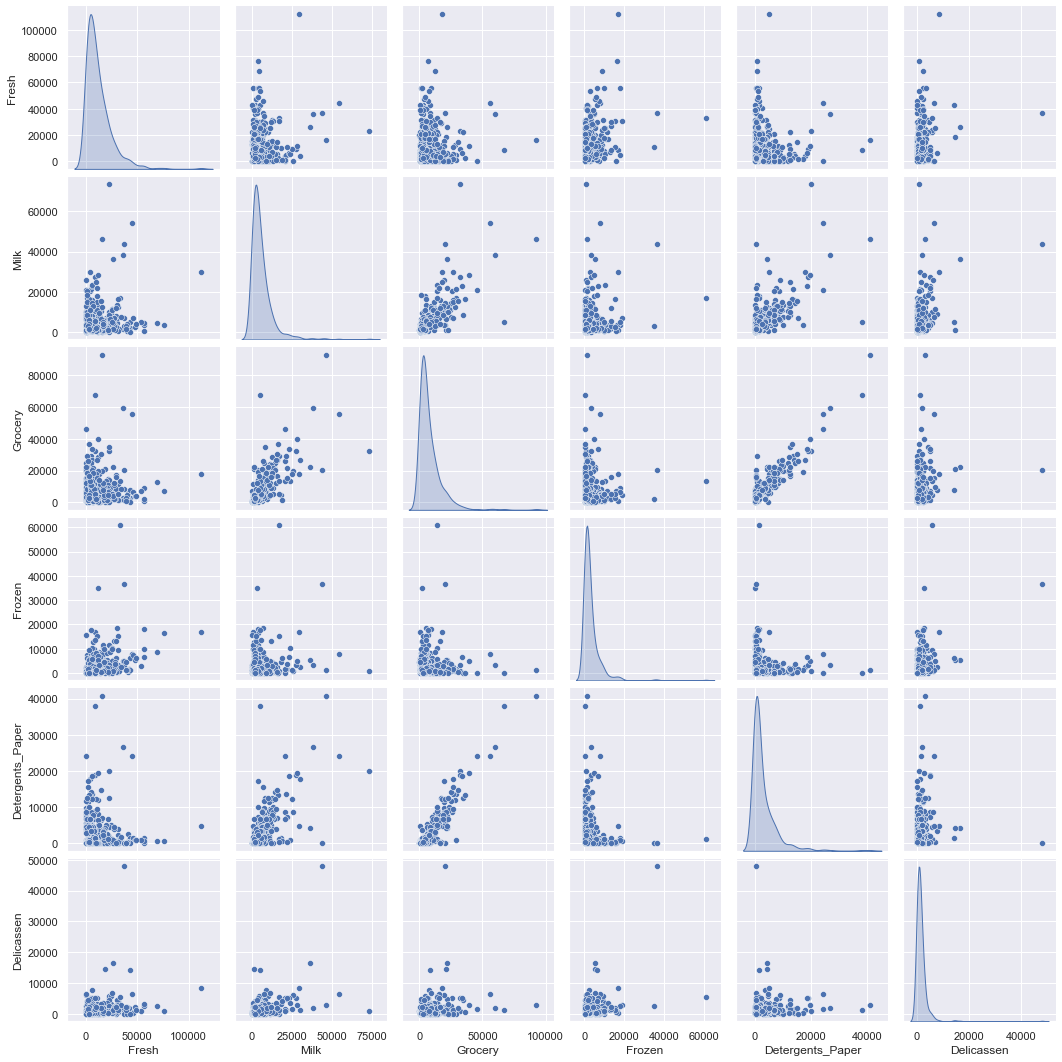

In [29]:
plot1=sns.pairplot(df_Con, diag_kind='kde')

In [30]:
mean_df=df.describe().loc['mean',:]
mean_df

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

Q. Find optimal number of features using RFECV and show the plot between Number of features 
selected vs Cross validation score (use channel as target variable)


In [31]:
X = scaled_frame.drop(['Channel'], axis=1)
y = df['Channel'] # Channel has 2 values so we will use channel here from main table

# convert channel into binary values
y[y == 2] = 0
y[y == 1] = 1

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

lr, knn = LinearRegression(), KNeighborsClassifier()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [34]:
print("Fit raw features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))
print("GBC: ", GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test))
print("RFC: ", RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test))

Fit raw features:
 LR: 0.26124123681110134
KNN: 0.9
GBC:  0.9090909090909091
RFC:  0.9


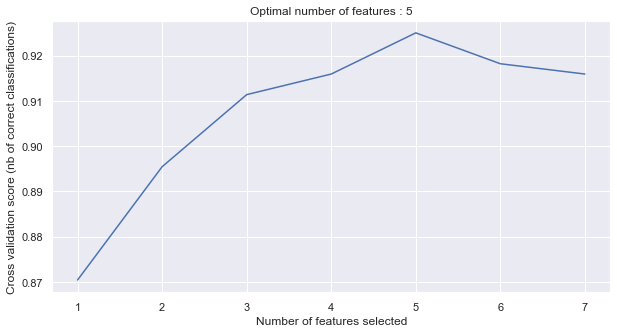

In [35]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

Here we will use RFECV using GradientBoostingClassifier with pipleline

In [36]:
model = GradientBoostingClassifier()
rfecv = RFECV(estimator=GradientBoostingClassifier())

Feature selection is an important task and it is crucial when the data in question has many features. The optimal number of features also leads to improved model accuracy. Obtaining the most important features and the number of optimal features can be obtained via feature importance or feature ranking.

## Recursive Feature Elimination

Instead of manually configuring the number of features(RFE), it would be very nice if we could automatically select them. This can be achieved via recursive feature elimination and cross-validation. This is done via the RFECV.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

    Pipeline — since we’ll perform some cross-validation. It’s best practice in order to avoid data leakage.
    RepeatedStratifiedKFold — for repeated stratified cross-validation.
    cross_val_score — for evaluating the score on cross-validation.
    GradientBoostingClassifier — the estimator we’ll use.
    numpy — so that we can compute the mean of the scores.

In [38]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
n_scores = cross_val_score(pipeline, X,y, scoring='accuracy', cv=cv, n_jobs = -1)
np.mean(n_scores)

0.9077272727272727

Let’s fit the pipeline and then obtain the optimal number of features.

In [39]:
pipeline.fit(X,y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [40]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


Once fitted, the following attributes can be obtained:
  
    ranking_ — the ranking of the features.
    n_features_ — the number of features that have been selected.
    support_ — an array that indicates whether or not a feature was selected.
    grid_scores_ — the scores obtained from cross-validation.

In [41]:
rfecv.support_

array([False, False,  True,  True,  True,  True,  True])

Lets put that into a dataframe and check the result.

In [42]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


With the grid_scores_ we can plot a graph showing the cross-validated scores.

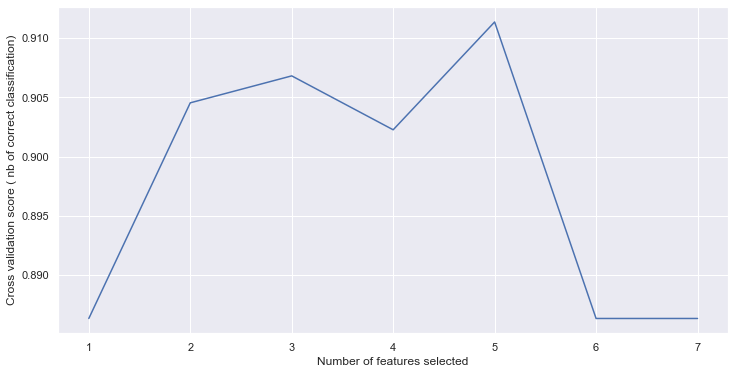

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ( nb of correct classification)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We have concluded that Milk, Grocery, Frozen, Detergents_Paper and Delicassen are optimal features.

Q. Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the 
optimum number of clusters


In [44]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

In [45]:
# First we need to convert our categorical features (region and channel) to dummy variable:
# df2 = pd.get_dummies(df)
# X1 = df2.iloc[:,:].values

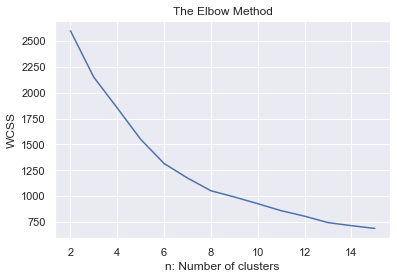

In [46]:
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_frame) # Standard scaler 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    # silhouette score
#     silhouette_avg = silhouette_score(df, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()

This graph looks like elbow and we have to(can) determine that elbow point.
Here the elbow point comes at around 6 and this our optimal number of clusters for the above data which we should choose.
If we look at the figure carefully after 6 when we go on increasing the number of cluster WCSS reduces slightly.

In [47]:
kmeans = KMeans(n_clusters = 6,random_state = 111)
y_means = kmeans.fit(scaled_frame)

In [48]:
y_means

KMeans(n_clusters=6, random_state=111)

In [49]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  1313.9619874240173

Centroids: 
 [[-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [ 1.44865163e+00  1.66562579e-01 -3.35427763e-01  4.58126517e-01
   6.73224816e-01 -3.49684911e-01  6.89164252e-01  4.76614618e-02]
 [-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.50800431e-01  3.09580198e-01  1.86860622e+00 -1.26905907e-01
  -2.56963592e-01  1.42079094e+00 -4.18345174e-01  4.02778334e-01]]


In [50]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    172
1    125
2     86
5     46
3     10
4      1
dtype: int64

Q. Implement PCA with number of original features to answer how much variance is explained by 
first 2 components and by first 4 components and visualize the clusters in the data

In [51]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(scaled_frame)

In [52]:
pca2 = PCA(n_components=2).fit(scaled_frame)
pca2d = pca2.transform(scaled_frame)

print("Explained variance is:",pca2.explained_variance_)
print("Explained variance ratio",pca2.explained_variance_ratio_)
print("Variance for 1st component is 38.75% & 2nd component is 22.37%")

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]
Variance for 1st component is 38.75% & 2nd component is 22.37%


From the above output, we can observe that the principal component 1 holds 38.75% of the information while the principal component 2 holds only 22.37% of the information.

Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]


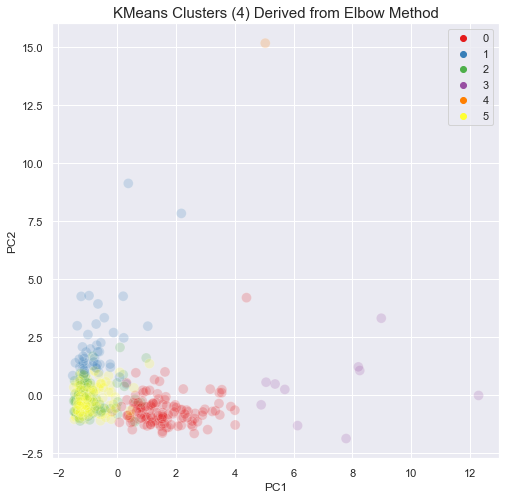

In [53]:
pca4 = PCA(n_components=4).fit(scaled_frame)
pca4d = pca4.transform(scaled_frame)

print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio is:",pca4.explained_variance_ratio_)

plt.figure(figsize = (8,8))
sns.scatterplot(pca4d[:,0], pca4d[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

From the above output, we can observe that the principal component 1 holds 38.75% of the information while the principal component 2 holds only 22.37% , 3 holds 12% and 4 holds 9%of the information.

Q. Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [54]:
X = df.drop('Channel', axis=1)

y = df['Channel']

In [55]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [56]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

    y label contain values as 1 and 2
    We will convert it into 0 and 1 for further analysis.

In [57]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [58]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

We will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [59]:
# import sys
# !{sys.executable} -m pip install xgboost

## Train the XGBoost Classifier 

## k-fold Cross Validation using XGBoost

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [61]:
# CV model
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [62]:
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

Accuracy: 91.14% (2.08%)


In this kernel, I have implemented XGBoostclassifier with Python and Scikit-Learn to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

The y labels contain values as 1 and 2. We have converted them into 0 and 1 for further analysis.

We have performed k-fold cross-validation with XGBoost classifier.
This example summarizes the performance of the default model configuration on the dataset including both the mean and standard deviation classification accuracy.

In [63]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [64]:
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')

In [65]:
Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))

f1score=round(2*((Recall*Precision)/(Recall+Precision)),3)

In [66]:
print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))

Accuracy= 91.136364, Recall=91.136000, Precision=91.824000, f1score=91.479000
